In [70]:
# importing necesseary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import random
import time
from sklearn.utils import shuffle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras

# reading from csv file
df = pd.read_csv('../ML-Workspace/tasks_table.csv', sep=';', low_memory=False)
df.head(10)

,TasksId,Title,PriorityId,TaxYear,DueDate,TaskTypeId,TaskCategoryId,TaskStatusId,JurisdictionId,FormId,...,NatureOfNoticeId,RelatedTaskId,FillingTypeId,OriginallyPreparedById,AccountStatusId,EntityTypeId,IsMissingInformation,ReadyForTaxProcessingDate,ReadyForTaxProcessingBy,IsReadyForTaxProcessing
0,1,355916T-Trust 90577741,15.0,2021.0,30.09.2021,10,44.0,54,1.0,9.0,...,NaN,NaN,1.0,NaN,1009.0,14.0,1.0,NaN,NaN,1
1,2,355926T-Trust 90578034,15.0,2019.0,30.09.2020,10,44.0,1012,1.0,9.0,...,NaN,NaN,1.0,NaN,1004.0,14.0,NaN,"19:16,7",280.0,3
2,3,355926T-Trust 90578034,15.0,2020.0,30.09.2021,10,44.0,1017,1.0,9.0,...,NaN,NaN,1.0,NaN,1002.0,14.0,NaN,NaN,NaN,1
3,4,355936T-Trust 90578327,15.0,2019.0,30.09.2020,10,44.0,1012,1.0,9.0,...,NaN,NaN,1.0,NaN,1004.0,14.0,NaN,"19:16,7",280.0,3
4,5,355936T-Trust 90578327,15.0,2020.0,30.09.2021,10,44.0,1013,1.0,9.0,...,NaN,NaN,1.0,NaN,1003.0,14.0,NaN,NaN,NaN,1
5,6,355946T-Trust 90578620,15.0,2019.0,30.09.2020,10,44.0,1009,1.0,9.0,...,NaN,NaN,1.0,NaN,1006.0,14.0,NaN,NaN,NaN,1
6,7,355946T-Trust 90578620,15.0,2020.0,30.09.2021,10,44.0,1013,1.0,9.0,...,NaN,NaN,1.0,NaN,1020.0,14.0,NaN,NaN,NaN,1
7,8,355956T-Trust 90578913,15.0,2019.0,30.09.2020,10,44.0,1009,1.0,9.0,...,NaN,NaN,1.0,NaN,1011.0,14.0,NaN,NaN,NaN,1
8,9,355956T-Trust 90578913,15.0,2020.0,30.09.2021,10,44.0,1013,1.0,9.0,...,NaN,NaN,1.0,NaN,1020.0,14.0,NaN,NaN,NaN,1
9,10,355966T-Trust 90579206,15.0,2019.0,30.09.2020,10,44.0,1011,1.0,9.0,...,NaN,NaN,1.0,NaN,1021.0,18.0,NaN,NaN,NaN,1


In [71]:
# calculating how many Nan rows columns have, for determining data quality

columnNames = df.columns.values

for i in columnNames :
    print(i + " : " + str(df[str(i)].isnull().sum()))

TasksId : 0
Title : 586892
PriorityId : 395469
TaxYear : 81976
DueDate : 71259
TaskTypeId : 0
TaskCategoryId : 342484
TaskStatusId : 0
JurisdictionId : 268285
FormId : 266984
AssignedTo : 200249
CreatedBy : 0
CreatedDate : 0
ModifiedBy : 215461
ModifiedDate : 215469
StatusID : 0
EntityType : 617595
Tier : 559868
WorkflowStatusId : 515879
TaxAuthority : 922143
NatureOfNoticeId : 921106
RelatedTaskId : 936535
FillingTypeId : 700481
OriginallyPreparedById : 866553
AccountStatusId : 515026
EntityTypeId : 67251
IsMissingInformation : 643026
ReadyForTaxProcessingDate : 778785
ReadyForTaxProcessingBy : 778785
IsReadyForTaxProcessing : 0


In [72]:
len(df.index)

938564

In [73]:
# as we can see above for a 938.564 rows dataframe we have too many Nan values in related columns
# purpose of this model determining if we can find if a task passed it's duedate or not
# so we are going to remove columns which is not related with our purpose

df = df.drop(['Title','FormId','EntityType', 'Tier','WorkflowStatusId','TaxAuthority','NatureOfNoticeId','RelatedTaskId','FillingTypeId','OriginallyPreparedById','AccountStatusId','EntityTypeId','IsMissingInformation','ReadyForTaxProcessingDate','ReadyForTaxProcessingBy','StatusID','JurisdictionId', 'TaxYear','CreatedBy','ModifiedBy'],axis=1)

In [74]:
df.head(10)

,TasksId,PriorityId,DueDate,TaskTypeId,TaskCategoryId,TaskStatusId,AssignedTo,CreatedDate,ModifiedDate,IsReadyForTaxProcessing
0,1,15.0,30.09.2021,10,44.0,54,280.0,25.10.2020,25.10.2020,1
1,2,15.0,30.09.2020,10,44.0,1012,280.0,25.10.2020,25.10.2020,3
2,3,15.0,30.09.2021,10,44.0,1017,280.0,25.10.2020,25.10.2020,1
3,4,15.0,30.09.2020,10,44.0,1012,280.0,25.10.2020,25.10.2020,3
4,5,15.0,30.09.2021,10,44.0,1013,280.0,25.10.2020,25.10.2020,1
5,6,15.0,30.09.2020,10,44.0,1009,280.0,25.10.2020,25.10.2020,1
6,7,15.0,30.09.2021,10,44.0,1013,280.0,25.10.2020,25.10.2020,1
7,8,15.0,30.09.2020,10,44.0,1009,280.0,25.10.2020,25.10.2020,1
8,9,15.0,30.09.2021,10,44.0,1013,280.0,25.10.2020,25.10.2020,1
9,10,15.0,30.09.2020,10,44.0,1011,280.0,25.10.2020,25.10.2020,1


In [75]:
# if we look at the data, it is clear to us that we have bunch of categorical data like 
# PriorityId(determines priority level), TaskTypeId(determines type of the task) etc..
# that means our case is classification problem
# so let's start data preprocessing

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938564 entries, 0 to 938563
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TasksId                  938564 non-null  int64  
 1   PriorityId               543095 non-null  float64
 2   DueDate                  867305 non-null  object 
 3   TaskTypeId               938564 non-null  int64  
 4   TaskCategoryId           596080 non-null  float64
 5   TaskStatusId             938564 non-null  int64  
 6   AssignedTo               738315 non-null  float64
 7   CreatedDate              938564 non-null  object 
 8   ModifiedDate             723095 non-null  object 
 9   IsReadyForTaxProcessing  938564 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 71.6+ MB


In [76]:
# as we can see above categories are imbalanced with each other to fix this first, we can delete all nan values or modify them. 
# since imbalancing is too much between them instead of modifying them deleting nan values is the best solution

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330787 entries, 0 to 938562
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TasksId                  330787 non-null  int64  
 1   PriorityId               330787 non-null  float64
 2   DueDate                  330787 non-null  object 
 3   TaskTypeId               330787 non-null  int64  
 4   TaskCategoryId           330787 non-null  float64
 5   TaskStatusId             330787 non-null  int64  
 6   AssignedTo               330787 non-null  float64
 7   CreatedDate              330787 non-null  object 
 8   ModifiedDate             330787 non-null  object 
 9   IsReadyForTaxProcessing  330787 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 27.8+ MB


In [77]:
# now we have a balanced data in a way which there are no null values in the data
# lets check if distribution in the data is normal
# because imbalance in column value distribution can lead algorithm to learn too much where there is so much of that value
# basically what we are going to do is if there is too much of a value we delete it
df.PriorityId.describe()

count    330787.000000
mean         13.102852
std           3.278637
min           1.000000
25%          11.000000
50%          15.000000
75%          15.000000
max          29.000000
Name: PriorityId, dtype: float64

C:\Users\PQ353ZP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


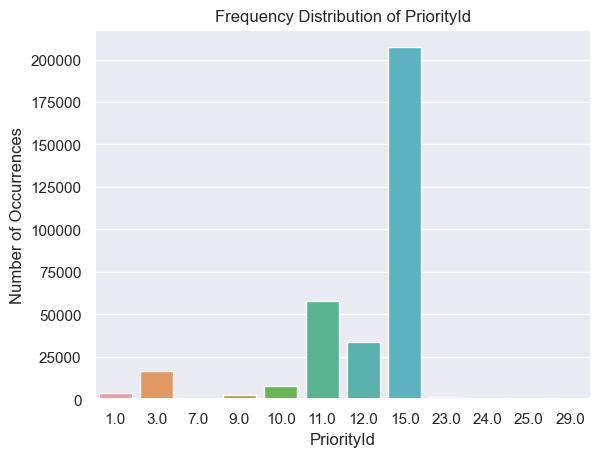

<Figure size 640x480 with 0 Axes>

In [78]:
PriorityId_count = df['PriorityId'].value_counts()
sns.set(style="darkgrid")
sns.barplot(PriorityId_count.index, PriorityId_count.values, alpha=0.9)
plt.title('Frequency Distribution of PriorityId')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('PriorityId', fontsize=12)
plt.show()
plt.clf()

In [79]:
# above example shows us percentile distribution of the data
# as you can see there is a lot of in the distribution

df = df[df['PriorityId'] != 15]
df.PriorityId.describe() 

count    123469.000000
mean          9.917331
std           3.550782
min           1.000000
25%          11.000000
50%          11.000000
75%          12.000000
max          29.000000
Name: PriorityId, dtype: float64

C:\Users\PQ353ZP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


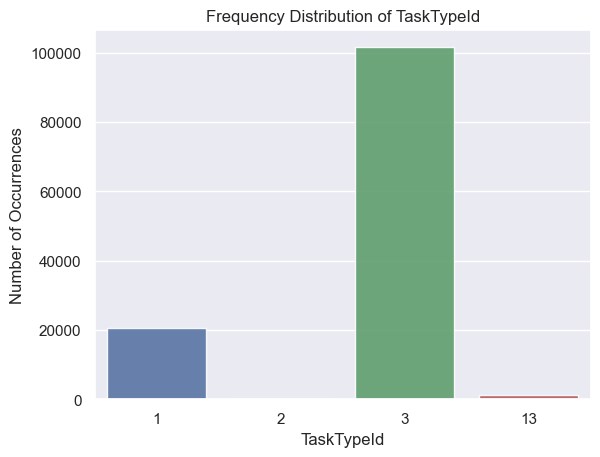

<Figure size 640x480 with 0 Axes>

In [80]:
TaskTypeId_count = df['TaskTypeId'].value_counts()
sns.set(style="darkgrid")
sns.barplot(TaskTypeId_count.index, TaskTypeId_count.values, alpha=0.9)
plt.title('Frequency Distribution of TaskTypeId')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('TaskTypeId', fontsize=12)
plt.show()
plt.clf()

C:\Users\PQ353ZP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


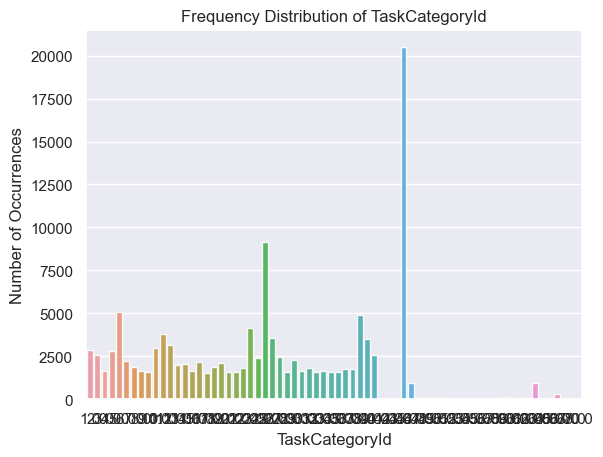

<Figure size 640x480 with 0 Axes>

In [81]:
TaskCategoryId_count = df['TaskCategoryId'].value_counts()
sns.set(style="darkgrid")
sns.barplot(TaskCategoryId_count.index, TaskCategoryId_count.values, alpha=0.9, dodge=True)
plt.title('Frequency Distribution of TaskCategoryId')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('TaskCategoryId', fontsize=12)
plt.show()
plt.clf()

In [82]:
# since some of column have too many categories we are not able too visualize them correctly
# in that case we are using describe() method to see percentiles

df.TaskCategoryId.describe()

count    123469.000000
mean         25.341114
std          14.710017
min           1.000000
25%          12.000000
50%          25.000000
75%          38.000000
max          70.000000
Name: TaskCategoryId, dtype: float64

In [83]:
df = df[df['TaskCategoryId'] != 38]
df.TaskCategoryId.describe() 

count    118542.000000
mean         24.814969
std          14.779751
min           1.000000
25%          12.000000
50%          25.000000
75%          37.000000
max          70.000000
Name: TaskCategoryId, dtype: float64

In [84]:
df = df[df['TaskCategoryId'] != 37]
df.TaskCategoryId.describe() 

count    116792.000000
mean         24.632389
std          14.814050
min           1.000000
25%          12.000000
50%          25.000000
75%          39.000000
max          70.000000
Name: TaskCategoryId, dtype: float64

C:\Users\PQ353ZP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


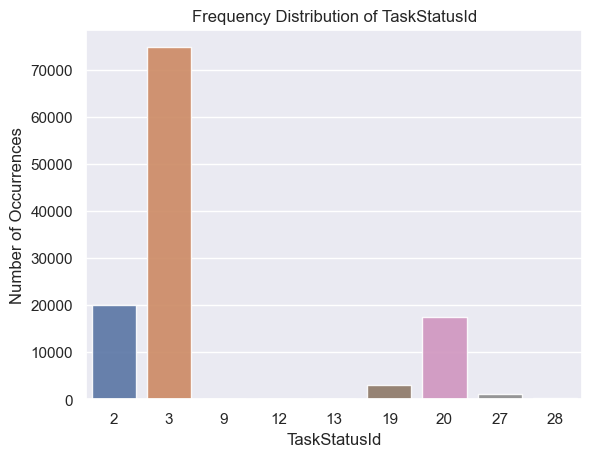

<Figure size 640x480 with 0 Axes>

In [85]:
TaskStatusId_count = df['TaskStatusId'].value_counts()
sns.set(style="darkgrid")
sns.barplot(TaskStatusId_count.index, TaskStatusId_count.values, alpha=0.9, dodge=True)
plt.title('Frequency Distribution of TaskStatusId')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('TaskStatusId', fontsize=12)
plt.show()
plt.clf()

C:\Users\PQ353ZP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


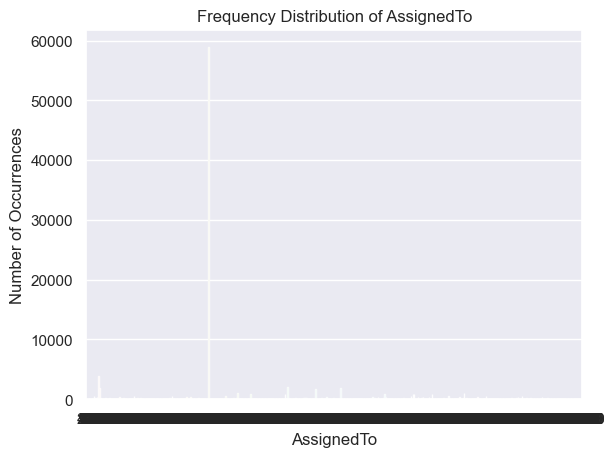

<Figure size 640x480 with 0 Axes>

In [86]:
AssignedTo_count = df['AssignedTo'].value_counts()
sns.set(style="darkgrid")
sns.barplot(AssignedTo_count.index, AssignedTo_count.values, alpha=0.9, dodge=True)
plt.title('Frequency Distribution of AssignedTo')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('AssignedTo', fontsize=12)
plt.show()
plt.clf()

In [87]:
df.AssignedTo.describe()

count    116792.000000
mean        415.085597
std         298.807358
min           1.000000
25%         280.000000
50%         280.000000
75%         517.000000
max        1473.000000
Name: AssignedTo, dtype: float64

In [18]:
df = df[df['AssignedTo'] != 280]
df.AssignedTo.describe() 



count    58112.000000
mean       552.298269
std        377.636657
min          1.000000
25%        229.000000
50%        517.000000
75%        857.000000
max       1473.000000
Name: AssignedTo, dtype: float64

C:\Users\PQ353ZP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


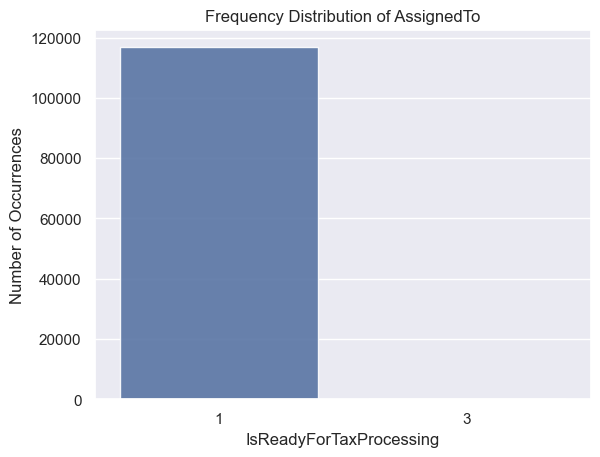

In [88]:
IsReadyForTaxProcessing_count = df['IsReadyForTaxProcessing'].value_counts()
sns.set(style="darkgrid")
sns.barplot(IsReadyForTaxProcessing_count.index, IsReadyForTaxProcessing_count.values, alpha=0.9, dodge=True)
plt.title('Frequency Distribution of AssignedTo')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('IsReadyForTaxProcessing', fontsize=12)
plt.show()

In [89]:
# since we have highly 1 in the distribution, we do not need that column bc it is not varies
df = df.drop('IsReadyForTaxProcessing', axis = 1)

In [90]:
# converting all datetime columns from str to datetime
df['CreatedDate'] = pd.to_datetime(df['CreatedDate'])
df['ModifiedDate'] = pd.to_datetime(df['ModifiedDate'])
df['DueDate'] = pd.to_datetime(df['DueDate'])

C:\Users\PQ353ZP\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15.09.2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\PQ353ZP\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25.10.2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\PQ353ZP\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27.09.2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\PQ353ZP\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27.10.2020' in DD/MM/YYYY format. Provide format o

In [91]:
# lets start with basic which we label the data late/ornot by checking whether
# if modified(closed) date is bigger than duedate or not

lateornot = []

df = df.reset_index()
df.drop(columns=['index'],inplace=True)

for index, row in df.iterrows():
    if row['DueDate'] < row['ModifiedDate']:
        lateornot.append(True)
    else:
        lateornot.append(False)

df['IsItLate'] = lateornot

In [92]:
df.head(10)

,TasksId,PriorityId,DueDate,TaskTypeId,TaskCategoryId,TaskStatusId,AssignedTo,CreatedDate,ModifiedDate,IsItLate
0,19411,12.0,2021-12-15,3,19.0,2,296.0,2021-09-15,2022-06-13,True
1,19412,11.0,2020-10-28,3,10.0,2,163.0,2020-10-25,2020-10-26,False
2,19413,12.0,2020-07-10,3,65.0,2,441.0,2020-10-25,2022-12-07,True
3,19414,10.0,2020-05-10,3,65.0,2,170.0,2020-10-25,2022-02-06,True
4,19415,9.0,2020-10-19,3,23.0,2,260.0,2020-10-25,2022-06-05,True
5,19416,11.0,2020-10-28,3,19.0,2,157.0,2020-10-25,2022-02-03,True
6,19417,11.0,2020-10-28,3,10.0,2,313.0,2021-09-27,2021-09-27,True
7,19418,12.0,2020-10-29,3,8.0,2,430.0,2021-09-27,2021-09-27,True
8,19419,10.0,2020-10-26,3,13.0,2,165.0,2020-10-25,2020-10-25,False
9,19420,9.0,2020-10-25,3,23.0,2,408.0,2020-10-25,2022-02-03,True


In [93]:
# removing unnecesseary columns 
df_new = df.drop(['TasksId', 'DueDate', 'CreatedDate', 'ModifiedDate'], axis = 1)

# resetting indexes in dataframe
df_new = df_new.reset_index()
df_new.drop(columns=['index'],inplace=True)
df_new.head()

,PriorityId,TaskTypeId,TaskCategoryId,TaskStatusId,AssignedTo,IsItLate
0,12.0,3,19.0,2,296.0,True
1,11.0,3,10.0,2,163.0,False
2,12.0,3,65.0,2,441.0,True
3,10.0,3,65.0,2,170.0,True
4,9.0,3,23.0,2,260.0,True


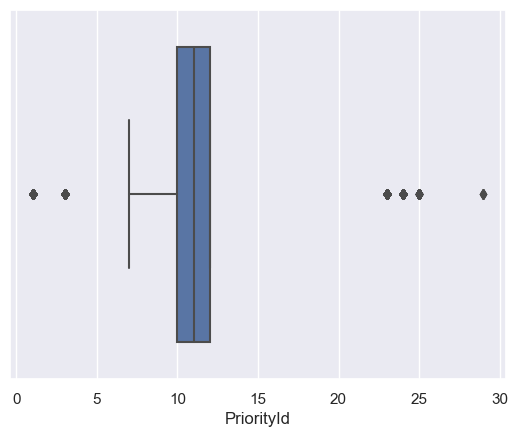

In [94]:
# since some of the algorithms required data to be distributed normally before doing any training 
# we should apply normality tests
# If a variable has a normal distribution, we should see the mean and median in the center.

# Box Plot

import pylab
import scipy.stats as stats

df_new.dropna(inplace=True)
priorityId_dist = df_new['PriorityId']
ax1 = sns.boxplot(x=priorityId_dist)

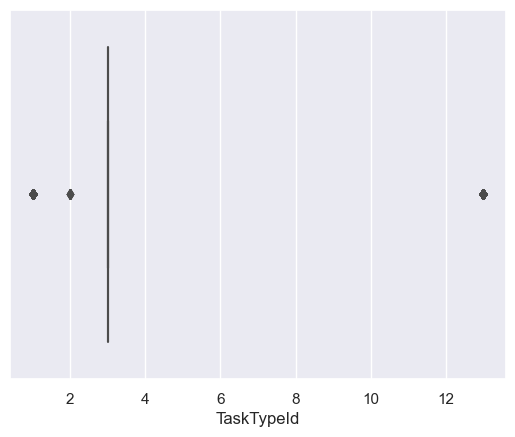

In [95]:
TaskTypeId_dist = df_new['TaskTypeId']
ax2 = sns.boxplot(x=TaskTypeId_dist)

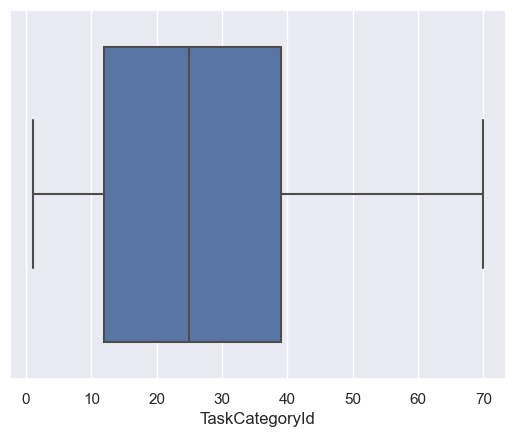

In [96]:
TaskCategoryId_dist = df_new['TaskCategoryId']
ax3 = sns.boxplot(x=TaskCategoryId_dist)

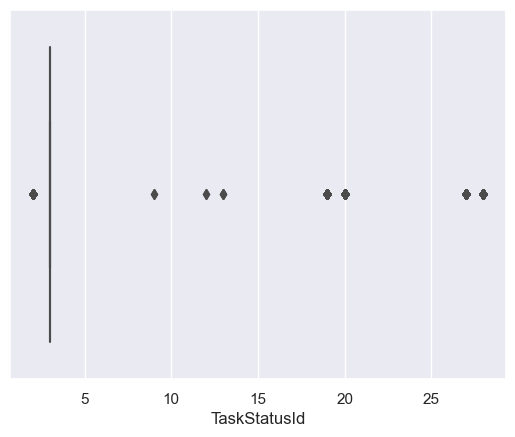

In [97]:
TaskStatusId_dist = df_new['TaskStatusId']
ax4 = sns.boxplot(x=TaskStatusId_dist)

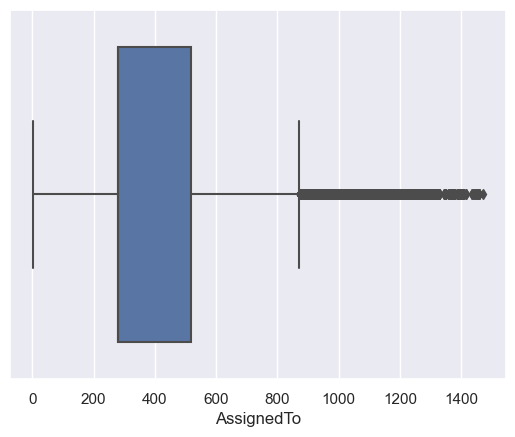

In [98]:
AssignedTo_dist = df_new['AssignedTo']
ax5 = sns.boxplot(x=AssignedTo_dist)

In [99]:
print(len(df_new[df_new.IsItLate == True]))
print(len(df_new[df_new.IsItLate == False]))

40636
76156


In [100]:
# as we can see our data is imbalanced means most of the distributions are not normal
# let's check for the variance(how far data varies from mean) of the data some algorithms can be sensitive about that
df_new.var()

PriorityId           13.182648
TaskTypeId            1.805115
TaskCategoryId      219.456080
TaskStatusId         47.400168
AssignedTo        89285.837464
IsItLate              0.226878
dtype: float64

In [101]:
# we know that algorithms work with numbers not with texts so we should encode our text data into numbers
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df_new['IsItLate'] = label_encoder.fit_transform(df_new['IsItLate']) 
df_new.head()

,PriorityId,TaskTypeId,TaskCategoryId,TaskStatusId,AssignedTo,IsItLate
0,12.0,3,19.0,2,296.0,1
1,11.0,3,10.0,2,163.0,0
2,12.0,3,65.0,2,441.0,1
3,10.0,3,65.0,2,170.0,1
4,9.0,3,23.0,2,260.0,1


In [102]:
y = df_new["IsItLate"]
X = df_new.drop(["IsItLate"], axis=1) 

In [103]:
# splintting data into train test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [104]:
# perform feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [105]:
# Instantiate the Support Vector Classifier (SVC)
from sklearn.svm import SVC

svc = SVC(C=1.0, random_state=1)
 
# Fit the model
svc.fit(X_train_std, y_train)

SVC(random_state=1)

In [106]:
# Make the predictions
from sklearn import metrics

y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.719


<AxesSubplot:title={'center':'Confusion Matrix for SVC'}, xlabel='Predicted label', ylabel='True label'>

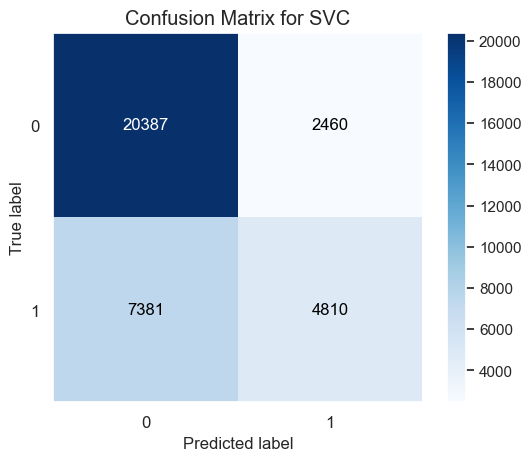

In [107]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_predict, normalize=False, title = 'Confusion Matrix for SVC')

In [108]:
# lets try one more algorothm called random forest classifier

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_std, y_train)

y_pred=clf.predict(X_test)

C:\Users\PQ353ZP\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [109]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.38021576574005367


In [111]:
# lets see if we can guess how many days it will be late
df['DaysFinished'] = (df['ModifiedDate'] - df['DueDate']).dt.days

In [112]:
for index, row in df.iterrows():
    if row['DaysFinished'] < 0:
        df.at[index,'DaysFinished'] = 0
    elif 30 >= row['DaysFinished'] > 0:
        df.at[index,'DaysFinished'] = 1
    elif 60 >= row['DaysFinished'] > 30:
        df.at[index,'DaysFinished'] = 2
    elif 90 >= row['DaysFinished'] > 60:
        df.at[index,'DaysFinished'] = 3
    elif 120 >= row['DaysFinished'] > 90:
        df.at[index,'DaysFinished'] = 4
    elif 150 >= row['DaysFinished'] > 120:
        df.at[index,'DaysFinished'] = 5
    elif 180 >= row['DaysFinished'] > 150:
        df.at[index,'DaysFinished'] = 6
    else:
        df.at[index,'DaysFinished'] = 7

In [113]:
print(len(df[df['DaysFinished'] == 0]))
print(len(df[df['DaysFinished'] == 1]))
print(len(df[df['DaysFinished'] == 2]))
print(len(df[df['DaysFinished'] == 3]))
print(len(df[df['DaysFinished'] == 4]))
print(len(df[df['DaysFinished'] == 5]))
print(len(df[df['DaysFinished'] == 6]))
print(len(df[df['DaysFinished'] == 7]))

74844
18272
4775
4556
4102
850
672
8721


In [114]:
df.drop(index=df[df['DaysFinished'] == 0].iloc[:62000].index.tolist(), inplace=True)
df.drop(index=df[df['DaysFinished'] == 1].iloc[:6000].index.tolist(), inplace=True)

In [115]:
print(len(df[df['DaysFinished'] == 0]))
print(len(df[df['DaysFinished'] == 1]))
print(len(df[df['DaysFinished'] == 2]))
print(len(df[df['DaysFinished'] == 3]))
print(len(df[df['DaysFinished'] == 4]))
print(len(df[df['DaysFinished'] == 5]))
print(len(df[df['DaysFinished'] == 6]))
print(len(df[df['DaysFinished'] == 7]))

12844
12272
4775
4556
4102
850
672
8721


In [116]:
df_New = df.drop(['TasksId','DueDate', 'CreatedDate','ModifiedDate','IsItLate'], axis=1)
df_New.head()

,PriorityId,TaskTypeId,TaskCategoryId,TaskStatusId,AssignedTo,DaysFinished
0,12.0,3,19.0,2,296.0,6
2,12.0,3,65.0,2,441.0,7
3,10.0,3,65.0,2,170.0,7
4,9.0,3,23.0,2,260.0,7
5,11.0,3,19.0,2,157.0,7


In [117]:
y = df_New["DaysFinished"]
df_New = df_New.drop(["DaysFinished"], axis=1) 

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_New, y, test_size=0.3, random_state=1, stratify=y)

In [119]:
# perform feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [120]:
# Instantiate the Support Vector Classifier (SVC)
from sklearn.svm import SVC

svc = SVC(C=1.0, random_state=1)
 
# Fit the model
svc.fit(X_train_std, y_train)

SVC(random_state=1)

In [121]:
# Make the predictions
from sklearn import metrics

y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.425
